In [133]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parameters
grid_size = 50 # Size of the 2D grid
initial_cells = 10  # Number of initial cells
iterations = 100  # Number of migration and proliferation cycles
proliferation_probability = 0.8  # Probability of a cell proliferating
differentiation_probability = 0.1  # Probability of a cell differentiating

# Initialize the grid (0 = empty, 1 = proliferating, 2 = differentiated)
grid = np.zeros((grid_size, grid_size), dtype=int)

# Randomly place initial cells
for _ in range(initial_cells):
    x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
    grid[x, y] = 1

# Migration function
def migrate(grid):
    new_grid = grid.copy()
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] > 0:  # If there's a cell (1 or 2)
                neighbors = [
                    (x-1, y), (x+1, y), (x, y-1), (x, y+1)
                ]
                random.shuffle(neighbors)
                for nx, ny in neighbors:
                    if 0 <= nx < grid_size and 0 <= ny < grid_size and new_grid[nx, ny] == 0:
                        new_grid[nx, ny] = grid[x, y]  # Move cell (preserve state)
                        new_grid[x, y] = 0
                        break
    return new_grid

# Proliferation function with differentiation
def proliferate_and_differentiate(grid):
    new_grid = grid.copy()
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] == 1:  # Proliferating cell
                # Check for differentiation
                if random.random() < differentiation_probability:
                    new_grid[x, y] = 2  # Differentiate the cell
                    continue

                # Proliferation logic
                if random.random() < proliferation_probability:
                    neighbors = [
                        (x-1, y), (x+1, y), (x, y-1), (x, y+1)
                    ]
                    random.shuffle(neighbors)
                    for nx, ny in neighbors:
                        if 0 <= nx < grid_size and 0 <= ny < grid_size and new_grid[nx, ny] == 0:
                            new_grid[nx, ny] = 1
                            break
    return new_grid





In [103]:
# Simulation function for sensitivity testing
def simulate(grid, iterations, grid_size, proliferation_probability, differentiation_probability):
    grids = []
    for i in range(iterations):
        grid = migrate(grid)  # Migration step
        grid = proliferate_and_differentiate(grid)  # Proliferation and differentiation
        grids.append(grid.copy())
    return grids

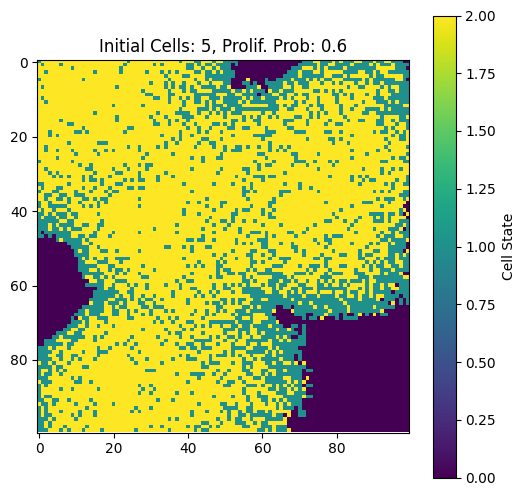

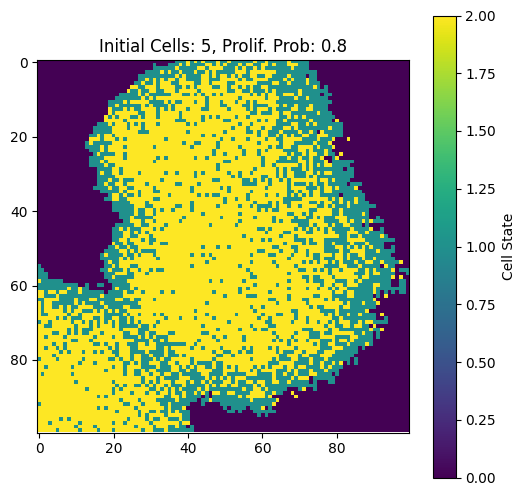

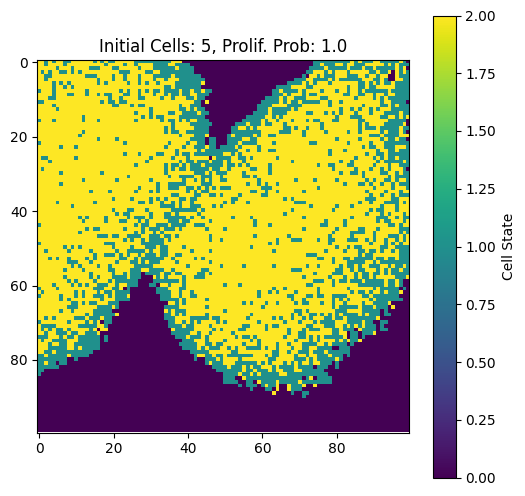

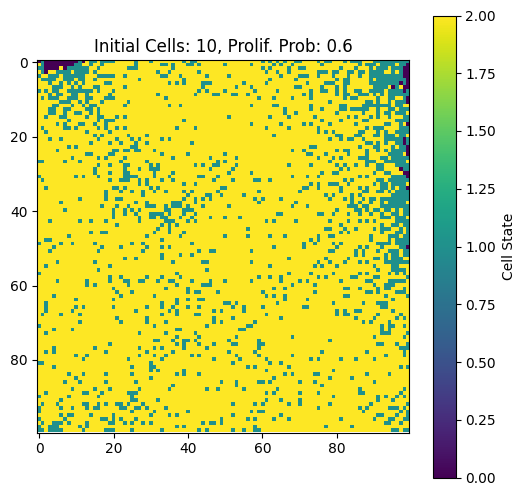

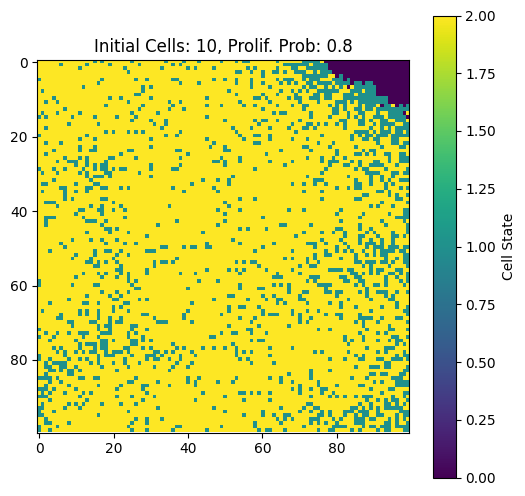

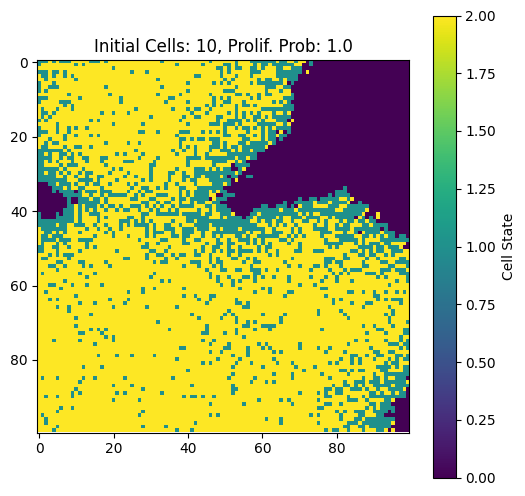

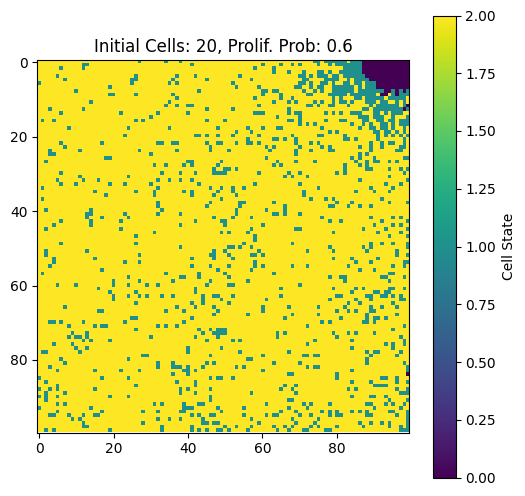

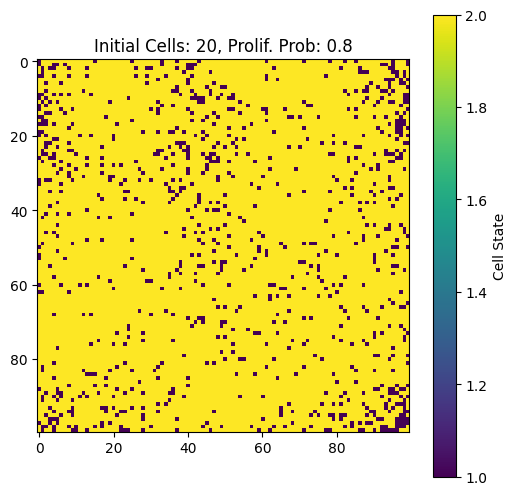

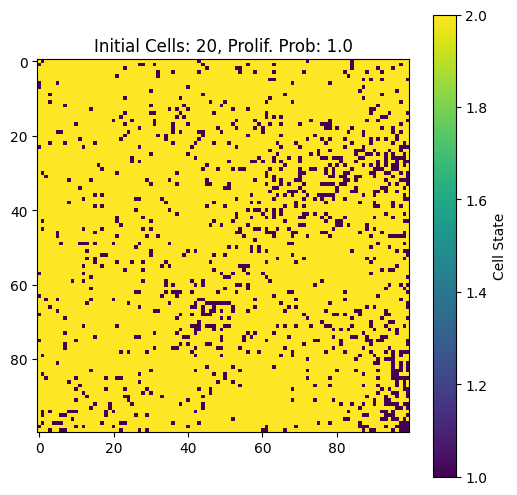

In [104]:
# Sensitivity testing function
def sensitivity_test(initial_cells_list, prob_list):
    for initial_cells in initial_cells_list:
        for prob in prob_list:
            # Initialize grid
            grid = np.zeros((grid_size, grid_size), dtype=int)
            for _ in range(initial_cells):
                x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
                grid[x, y] = 1

            # Simulate
            grids = simulate(grid, iterations, grid_size, prob, differentiation_probability)

            # Visualize final state
            plt.figure(figsize=(6, 6))
            plt.imshow(grids[-1], cmap="viridis", origin="upper")
            plt.title(f"Initial Cells: {initial_cells}, Prolif. Prob: {prob}")
            plt.colorbar(label="Cell State")
            plt.show()

# Run sensitivity test
sensitivity_test([5, 10, 20], [0.6, 0.8, 1.0])


## Counting total cell counts

In [105]:
def compute_total_cells(grid):
    return np.sum(grid > 0)  # Count all cells (state 1 and 2)

# Example
for row, initial_cells in enumerate([5, 10, 20]):
    for col, prob in enumerate([0.6, 0.8, 1]):
        grid = np.zeros((grid_size, grid_size), dtype=int)
        for _ in range(initial_cells):
            x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
            grid[x, y] = 1
        grids = simulate(grid, iterations, grid_size, prob, differentiation_probability)
        total_cells = compute_total_cells(grids[-1])
        print(f"Initial Cells: {initial_cells}, Prolif. Prob: {prob:.2f}, Total Cells: {total_cells}")


Initial Cells: 5, Prolif. Prob: 0.60, Total Cells: 8758
Initial Cells: 5, Prolif. Prob: 0.80, Total Cells: 6854
Initial Cells: 5, Prolif. Prob: 1.00, Total Cells: 6658
Initial Cells: 10, Prolif. Prob: 0.60, Total Cells: 8952
Initial Cells: 10, Prolif. Prob: 0.80, Total Cells: 9376
Initial Cells: 10, Prolif. Prob: 1.00, Total Cells: 9078
Initial Cells: 20, Prolif. Prob: 0.60, Total Cells: 9959
Initial Cells: 20, Prolif. Prob: 0.80, Total Cells: 9853
Initial Cells: 20, Prolif. Prob: 1.00, Total Cells: 10000


## Differentiation effect

In [106]:
def compute_cell_states(grid):
    proliferating_cells = np.sum(grid == 1)
    differentiated_cells = np.sum(grid == 2)
    return proliferating_cells, differentiated_cells

# Example
for row, initial_cells in enumerate([5, 10, 20]):
    for col, prob in enumerate([0.6, 0.8, 1.0]):
        grid = np.zeros((grid_size, grid_size), dtype=int)
        for _ in range(initial_cells):
            x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
            grid[x, y] = 1
        grids = simulate(grid, iterations, grid_size, prob, differentiation_probability)
        proliferating, differentiated = compute_cell_states(grids[-1])
        print(f"Initial Cells: {initial_cells}, Prolif. Prob: {prob:.2f}, Proliferating: {proliferating}, Differentiated: {differentiated}"+" ratio:",differentiated/proliferating)
          

Initial Cells: 5, Prolif. Prob: 0.60, Proliferating: 2593, Differentiated: 5816 ratio: 2.242961820285384
Initial Cells: 5, Prolif. Prob: 0.80, Proliferating: 1939, Differentiated: 6017 ratio: 3.1031459515214026
Initial Cells: 5, Prolif. Prob: 1.00, Proliferating: 2491, Differentiated: 5385 ratio: 2.1617824167001203
Initial Cells: 10, Prolif. Prob: 0.60, Proliferating: 1925, Differentiated: 7891 ratio: 4.099220779220779
Initial Cells: 10, Prolif. Prob: 0.80, Proliferating: 1642, Differentiated: 7464 ratio: 4.545676004872107
Initial Cells: 10, Prolif. Prob: 1.00, Proliferating: 1923, Differentiated: 6603 ratio: 3.433697347893916
Initial Cells: 20, Prolif. Prob: 0.60, Proliferating: 981, Differentiated: 9019 ratio: 9.193679918450561
Initial Cells: 20, Prolif. Prob: 0.80, Proliferating: 1295, Differentiated: 8618 ratio: 6.654826254826255
Initial Cells: 20, Prolif. Prob: 1.00, Proliferating: 1470, Differentiated: 8191 ratio: 5.572108843537415


## Visualization

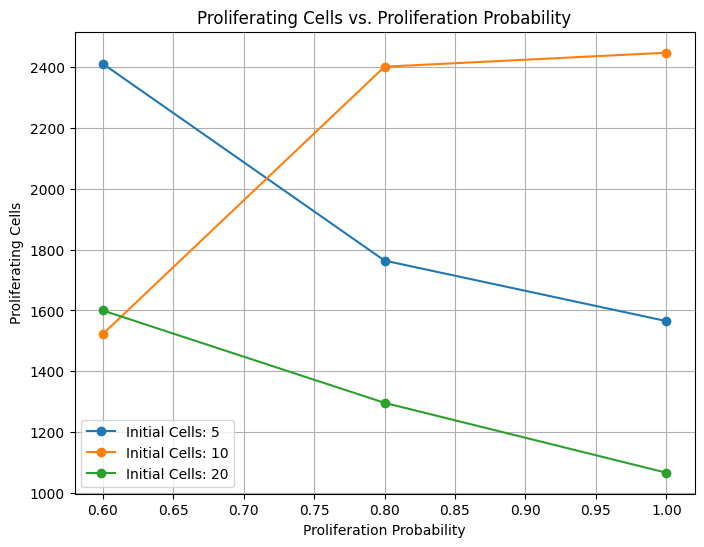

In [107]:
import matplotlib.pyplot as plt

# Example data collection
results = []
for initial_cells in [5, 10, 20]:
    for prob in [0.6, 0.8, 1.0]:
        grid = np.zeros((grid_size, grid_size), dtype=int)
        for _ in range(initial_cells):
            x, y = random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)
            grid[x, y] = 1
        grids = simulate(grid, iterations, grid_size, prob, differentiation_probability)
        total_cells = compute_total_cells(grids[-1])
        proliferating, differentiated = compute_cell_states(grids[-1])
        results.append((initial_cells, prob, total_cells, proliferating, differentiated))

# Plot total cells vs. parameters
plt.figure(figsize=(8, 6))
for initial_cells in [5, 10, 20]:
    proliferating_counts = [r[3] for r in results if r[0] == initial_cells]
    probs = [r[1] for r in results if r[0] == initial_cells]
    plt.plot(probs,proliferating_counts, marker='o', label=f'Initial Cells: {initial_cells}')
plt.xlabel("Proliferation Probability")
plt.ylabel("Proliferating Cells")
plt.title("Proliferating Cells vs. Proliferation Probability")
plt.legend()
plt.grid()
plt.show()


## Total cell vs Iterations


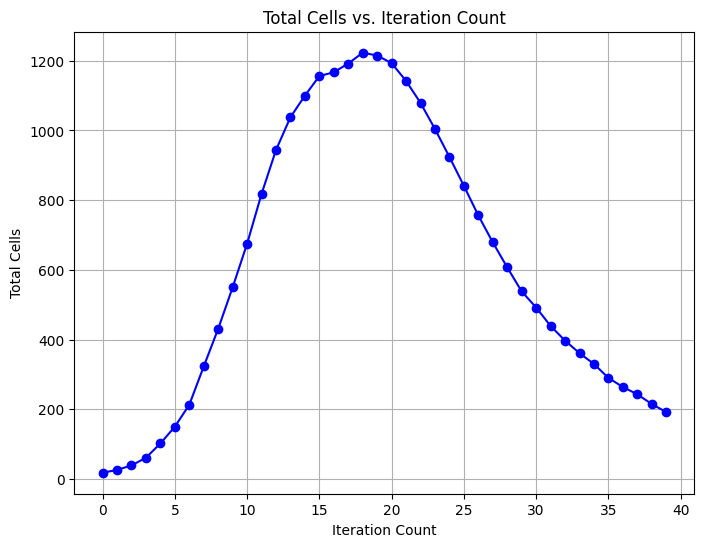

In [132]:
def compute_total_cells(grid):
    return np.sum(grid==1)  # Count all cells (state 1 and 2)

# Simulation function to track total cells
def simulate_and_track_cells(grid, iterations):
    total_cells_per_iteration = []
    for i in range(iterations):
        grid = migrate(grid)  # Perform migration
        grid = proliferate_and_differentiate(grid)  # Perform proliferation and differentiation
        total_cells = compute_total_cells(grid)  # Get total number of cells
        total_cells_per_iteration.append(total_cells)  # Store total cells
    return total_cells_per_iteration

# Run simulation and track total cells
total_cells_per_iteration = simulate_and_track_cells(grid, iterations)

# Plot total cells vs. iteration count
plt.figure(figsize=(8, 6))
plt.plot(range(iterations), total_cells_per_iteration, marker='o', linestyle='-', color='b')
plt.title("Total Cells vs. Iteration Count")
plt.xlabel("Iteration Count")
plt.ylabel("Total Cells")
plt.grid(True)
plt.show()
